# 1) Import des librairies et initialisation du Notebook

In [1]:
from lxml import html
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow import keras 
from sklearn import metrics
import sklearn.metrics as metrics
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
import catboost as cb
from sklearn.metrics import accuracy_score,log_loss
import numpy as np
from sklearn.metrics import precision_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import catboost as cb
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns',500)

# 2) Scraping des données de train et de test 

### a) Récupération des liens des données

In [2]:
base_link="https://archive.ics.uci.edu/ml"

html=requests.get(base_link+"/datasets/Poker+Hand").text
soup=BeautifulSoup(html,"lxml")
table=soup.find("body") 
name_part=soup.find("td",{"valign":"top"})

for link in table.find_all("a"):
    if link.get_text()=='Data Folder':
        Data_folder_link=link.get('href')

Data_folder_link=Data_folder_link.replace(".","",2)


html=requests.get(base_link+Data_folder_link ).text
soup=BeautifulSoup(html,"lxml")
table=soup.find("body") 

for link in table.find_all("a"):
    
    if link.get_text()=='poker-hand-testing.data':
        test_link=link.get('href')
    if link.get_text()=='poker-hand-training-true.data':
        train_link=link.get('href')

print(base_link+Data_folder_link+test_link)
print(base_link+Data_folder_link+train_link)

https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data


### Création du Datframe test

In [3]:
test_path = base_link+Data_folder_link+test_link
test = pd.read_csv(test_path, encoding="latin1")
test.head()

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


### c) Import du Datframe test

In [4]:
train_path = base_link+Data_folder_link+train_link
train = pd.read_csv(train_path, encoding="latin1")
train.head()

,1,10,1.1,11,1.2,13,1.3,12,1.4,1.5,9
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [5]:
#Dimension du jeu de train
train.shape

(25009, 11)

In [6]:
#Dimension du jeu de test
test.shape

(999999, 11)

In [7]:
#Renomage des colonnes des jeux de train et de test
test.columns=train.columns = ['Suit_of_card_1','Rank_of_card_1',
                              'Suit_of_card_2','Rank_of_card_2',
                              'Suit_of_card_3','Rank_of_card_3',
                              'Suit_of_card_4','Rank_of_card_4',
                              'Suit_of_card_5','Rank_of_card_5',
                              'Poker_Hand']


In [8]:
#Ajout d'une colonne Datasplit Dans les jeux de train et de test
train['datasplit']="train"
test['datasplit']="test"

In [9]:
train.head()
test.head()

,Suit_of_card_1,Rank_of_card_1,Suit_of_card_2,Rank_of_card_2,Suit_of_card_3,Rank_of_card_3,Suit_of_card_4,Rank_of_card_4,Suit_of_card_5,Rank_of_card_5,Poker_Hand,datasplit
0,3,12,3,2,3,11,4,5,2,5,1,test
1,1,9,4,6,1,4,3,2,3,9,1,test
2,1,4,3,13,2,13,2,1,3,6,1,test
3,3,10,2,7,1,2,2,11,4,9,0,test
4,1,3,4,5,3,4,1,12,4,6,0,test


In [10]:
result = pd.concat([train,test])

In [11]:
result[25000:]

,Suit_of_card_1,Rank_of_card_1,Suit_of_card_2,Rank_of_card_2,Suit_of_card_3,Rank_of_card_3,Suit_of_card_4,Rank_of_card_4,Suit_of_card_5,Rank_of_card_5,Poker_Hand,datasplit
25000,2,12,3,5,3,8,4,1,4,2,0,train
25001,4,10,2,13,4,5,4,7,1,5,1,train
25002,1,12,2,9,2,12,4,8,1,13,1,train
25003,3,5,3,7,4,11,3,11,3,2,1,train
25004,3,9,2,6,4,11,4,12,2,4,0,train
25005,4,1,4,10,3,13,3,4,1,10,1,train
25006,2,1,2,10,4,4,4,1,4,13,1,train
25007,2,12,4,3,1,10,1,12,4,9,1,train
25008,1,7,3,11,3,3,4,8,3,7,1,train
0,3,12,3,2,3,11,4,5,2,5,1,test


In [12]:
result = result.reset_index(drop=True)

In [13]:
unique_list=pd.unique(result['Poker_Hand'])

# 2) Visualisation de données

### a) Visualisation de la matrice de corrélation des colonnes

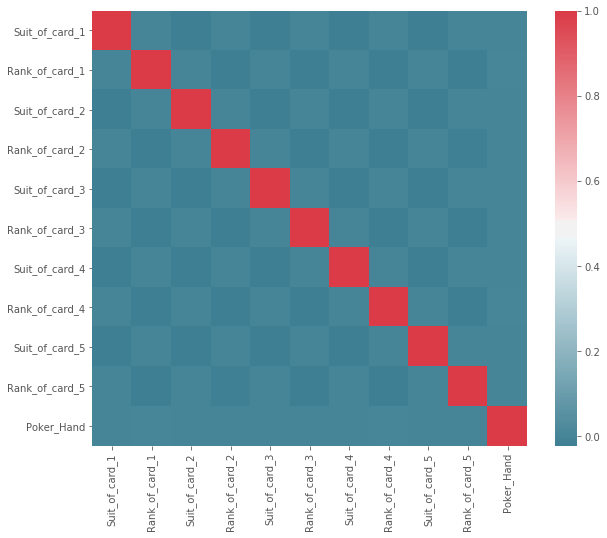

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
corr = result.corr()
sn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sn.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### b) Visualisation de la répartition des classes de la colonne Poker_Hand

In [15]:
x=len(unique_list)
datadic={}
for i,obs in enumerate(unique_list):
    datadic[obs] = len(result.loc[(result['Poker_Hand'] == obs)] )
    

In [16]:
datadic

{0: 513701,
 1: 433097,
 2: 48828,
 3: 21634,
 4: 3978,
 5: 2050,
 6: 1460,
 7: 236,
 8: 17,
 9: 7}

In [17]:
poker_hand_dic={0: "Nothing in hand; not a recognized poker hand",
                1: "One pair; one pair of equal ranks within five cards",
                2: "Two pairs; two pairs of equal ranks within five cards",
                3: "Three of a kind; three equal ranks within five cards",
                4: "Straight; five cards, sequentially ranked with no gaps",
                5: "Flush; five cards with the same suit",
                6: "Full house; pair + different rank three of a kind",
                7: "Four of a kind; four equal ranks within five cards",
                8: "Straight flush; straight + flush",
                9: "Royal flush; {Ace, King, Queen, Jack, Ten} + flush" }

###### Graphique de la répartition des classes de la colonne Poker_Hand

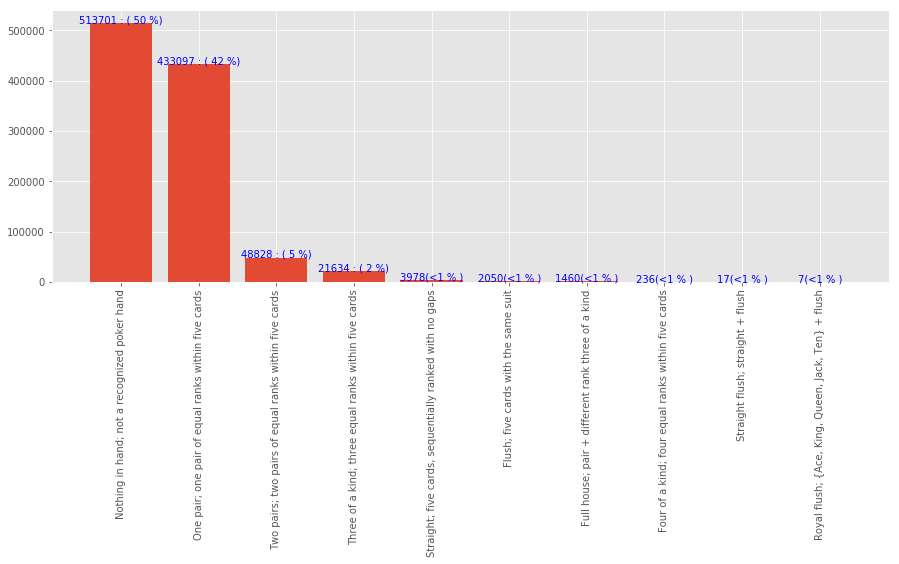

In [18]:
mpl.rcParams['figure.figsize'] = (15,5)

plt.bar(range(len(datadic)), datadic.values(), align='center')
plt.xticks(range(len(datadic)), list(poker_hand_dic.values()),rotation=90)

for a,b in zip(datadic.keys(), datadic.values()): 
     second_text=""
     if round(b/sum(datadic.values())*100)==0:
        second_text="(<1 % )"
     else:
        second_text=" : ( "+str(round(b/sum(datadic.values())*100))+" %)"    
     plt.text(a, b, str(b)  
 +second_text,      
              horizontalalignment='center',color='blue')

plt.show()

In [19]:
train=result.loc[(result['datasplit'] == "train")]
train = train.reset_index(drop=True)
train.pop('datasplit')
test=result.loc[(result['datasplit'] == "test")]
test = test.reset_index(drop=True)
test.pop('datasplit')

0         test
1         test
2         test
3         test
4         test
5         test
6         test
7         test
8         test
9         test
10        test
11        test
12        test
13        test
14        test
15        test
16        test
17        test
18        test
19        test
20        test
21        test
22        test
23        test
24        test
25        test
26        test
27        test
28        test
29        test
          ... 
999969    test
999970    test
999971    test
999972    test
999973    test
999974    test
999975    test
999976    test
999977    test
999978    test
999979    test
999980    test
999981    test
999982    test
999983    test
999984    test
999985    test
999986    test
999987    test
999988    test
999989    test
999990    test
999991    test
999992    test
999993    test
999994    test
999995    test
999996    test
999997    test
999998    test
Name: datasplit, Length: 999999, dtype: object

In [20]:
test.head()

,Suit_of_card_1,Rank_of_card_1,Suit_of_card_2,Rank_of_card_2,Suit_of_card_3,Rank_of_card_3,Suit_of_card_4,Rank_of_card_4,Suit_of_card_5,Rank_of_card_5,Poker_Hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


# 3)Modélisation

### a) Préprocessing

In [21]:
X_train = train.iloc[:, 0:10].values  
y_train = train.iloc[:, 10].values 
X_test = test.iloc[:, 0:10].values  
y_test = test.iloc[:, 10].values 

In [22]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

/home/ms/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ms/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/ms/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### b) Modèle Random Forest

In [23]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred = regressor.predict(X_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.5230625230625228
Mean Squared Error: 0.4750980850980854
Root Mean Squared Error: 0.6892735923405781


### c) Modèle CatBoost

In [26]:
#Catboost
#Random seeds are fixed at 1234 to make scores reproducible
def CVandTest(X_train,y_train,X_test,y_test):
    #80/20 train test split cross-validation
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    cat = cb.CatBoostClassifier(
        loss_function='MultiClassOneVsAll',
        random_seed = 1234
    )
    cat_model1 = cat.fit(X_train,y_train,verbose=False) 
    
    cat_predtrain=cat_model1.predict(X_train, prediction_type='Class')
    
    cat_predA = cat_model1.predict(X_test, prediction_type='Class')
    cat_predLL = cat_model1.predict(X_test, prediction_type='Probability')

    print("CV accuracy: {}".format(accuracy_score(y_test,cat_predA)))
    print("CV logloss: {}".format(log_loss(y_test,cat_predLL)))
    
   
    
    return (cat_predtrain,cat_predA, cat_predLL, cat_model1)

In [27]:
(cat_predtrain,cat_predA, cat_predLL, cat_model1) = CVandTest(X_train,y_train,X_test,y_test)

CV accuracy: 0.695965695965696
CV logloss: 0.7224519760056007


In [28]:
confusion_matrix(cat_predA,y_test)

array([[450742, 179406,   4166,    861,    162,   1866,      0,      0,
             0,      1],
       [ 50466, 243064,  43184,  18334,   3712,    130,   1240,    179,
            11,      2],
       [     0,     12,    244,     22,      0,      0,     37,      1,
             0,      0],
       [     0,      1,     28,   1904,      0,      0,    147,     50,
             0,      0],
       [     0,     15,      0,      0,     11,      0,      0,      0,
             1,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0]])

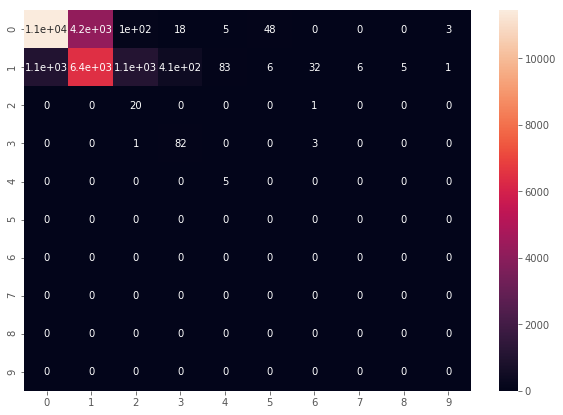

In [29]:
array = confusion_matrix(cat_predtrain,y_train)
df_cm = pd.DataFrame(array, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["0","1","2","3","4","5","6","7","8","9"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

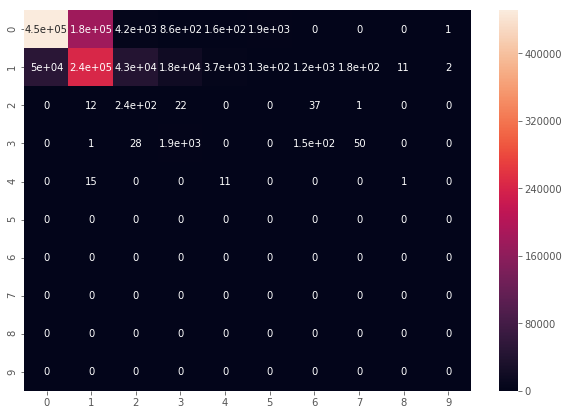

In [30]:
array = confusion_matrix(cat_predA,y_test)
df_cm = pd.DataFrame(array, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["0","1","2","3","4","5","6","7","8","9"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## d) Modélisation avec du Deep Learning : Keras

In [31]:
def model(input_shape , output_shape):
    net = keras.Sequential([
        keras.layers.BatchNormalization(),
        keras.layers.Dense(2048 ,input_shape=input_shape , activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(2048 , activation='relu' ),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(output_shape , activation='softmax')
    ])
    
    optimizer = keras.optimizers.Adam(lr=0.001)
    net.compile(optimizer=optimizer , loss='categorical_crossentropy' , metrics=['accuracy'])
    return net

Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
net = model((X_train.shape[1] , ) , Y_train.shape[1])
net.fit(X_train , Y_train , epochs=50 , batch_size=128)

Epoch 1/50
25009/25009 [==============================] - 9s 357us/step - loss: 0.9994 - acc: 0.5194
Epoch 2/50
25009/25009 [==============================] - 2s 86us/step - loss: 0.9512 - acc: 0.5381
Epoch 3/50
25009/25009 [==============================] - 2s 91us/step - loss: 0.9404 - acc: 0.5495
Epoch 4/50
25009/25009 [==============================] - 2s 91us/step - loss: 0.9256 - acc: 0.5611
Epoch 5/50
25009/25009 [==============================] - 2s 87us/step - loss: 0.9052 - acc: 0.5725
Epoch 6/50
25009/25009 [==============================] - 2s 95us/step - loss: 0.8848 - acc: 0.5847
Epoch 7/50
25009/25009 [==============================] - 2s 89us/step - loss: 0.8612 - acc: 0.6018
Epoch 8/50
25009/25009 [==============================] - 2s 97us/step - loss: 0.8263 - acc: 0.6194
Epoch 9/50
25009/25009 [==============================] - 3s 110us/step - loss: 0.7879 - acc: 0.6430
Epoch 10/50
25009/25009 [==============================] - 2s 97us/step - loss: 0.7465 - acc: 0.66

In [32]:
def compute_precision(predictions , y):
    class_diff = predictions - y
    count = 0
    for i in range(class_diff.shape[0]):
        if class_diff[i] == 0:
            count += 1
    return count / class_diff.shape[0]
    

predictions = np.argmax(net.predict(X_train , batch_size=256) , axis=1)
train_conf_matrix = confusion_matrix(y_train , predictions)
prec_train = compute_precision(predictions , y_train)
print('\n---Train---\n')
print(train_conf_matrix)
print('precision : ' , prec_train)
    
predictions = np.argmax(net.predict(X_test , batch_size=256) , axis=1)
test_conf_matrix = confusion_matrix(y_test , predictions)
prec_test = compute_precision(predictions , y_test)
print('\n---Test---\n')
print(test_conf_matrix)
print('precision : ' , prec_test)


---Train---

[[12493     0     0     0     0     0     0     0     0     0]
 [    0 10599     0     0     0     0     0     0     0     0]
 [    0     0  1206     0     0     0     0     0     0     0]
 [    0     0     0   513     0     0     0     0     0     0]
 [    0     0     0     0    93     0     0     0     0     0]
 [    0     0     0     0     0    54     0     0     0     0]
 [    0     0     0     0     0     0    36     0     0     0]
 [    0     0     0     0     0     0     0     6     0     0]
 [    0     0     0     0     0     0     0     0     5     0]
 [    0     0     0     0     0     0     0     0     0     4]]
precision :  1.0

---Test---

[[501173      0      0      0     35      0      0      0      0      0]
 [     0 422427     21      1     22      5      0      6     11      5]
 [     0   2119  41985   3271      0      0    153     93      1      0]
 [     0      0   5763  15115      0      0    159     84      0      0]
 [  1872    329      0      0   1

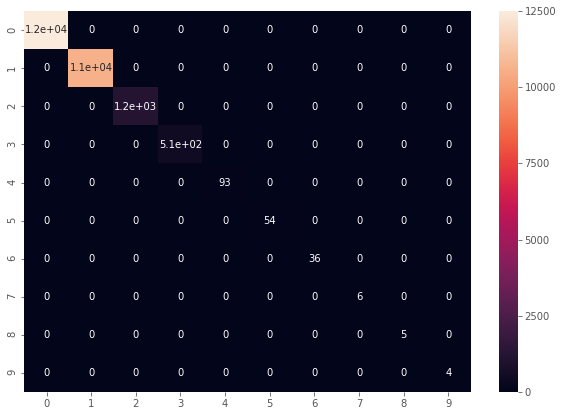

In [33]:
df_cm = pd.DataFrame(train_conf_matrix, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["0","1","2","3","4","5","6","7","8","9"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

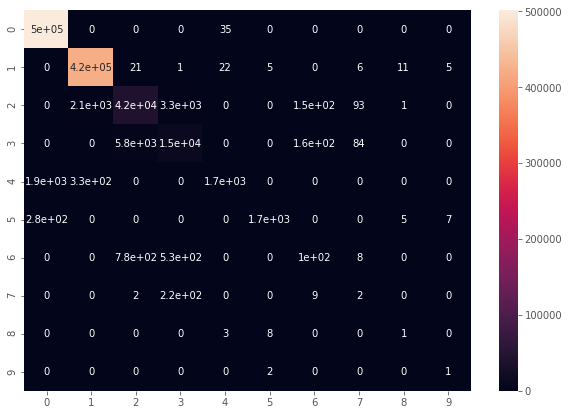

In [34]:
df_cm = pd.DataFrame(test_conf_matrix, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["0","1","2","3","4","5","6","7","8","9"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

## Utilisation de GridSearch avec CatBoost

In [ ]:
params = {
          'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200]}

In [ ]:
cat = cb.CatBoostClassifier(
        loss_function='MultiClassOneVsAll',
        random_seed = 1234, task_type = "GPU"
    )

In [ ]:
cat = cb.CatBoostClassifier(
        loss_function='MultiClassOneVsAll',
        random_seed = 1234)
cat_model = cat.fit(X_train,y_train,verbose=False) 

In [ ]:
from sklearn import grid_search
         
grid= grid_search.GridSearchCV(cat, params, n_jobs=-1)


In [ ]:
testd=cat.fit(X_train, y_train)

In [ ]:
mod=grid.fit(X_train, y_train)

In [ ]:
print (grid.best_score_, grid.best_estimator_)

In [ ]:
print(grid.best_estimator_.get_params())

In [ ]:
def catboost_param_tune(params,train,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res,prms,s'best:',ps.bestscore(),ps.bestparam())
    return ps.bestparam()

bestparams = catboost_param_tune(params,train_set,train_label,cat_dims)

In [ ]:
cat_model1 = cat.fit(X_train,y_train,verbose=False) 